In [ ]:
# ! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# os.environ['username'] = "rekhalodhi" # username from the json file
# os.environ['key'] = "b3a5d08ff70b9f6c085a23d12bc9b1a0" # key from the json file

In [ ]:
# !kaggle datasets download -d wordsforthewise/lending-club

 98% 1.24G/1.26G [00:10<00:00, 139MB/s]
100% 1.26G/1.26G [00:10<00:00, 124MB/s]


In [ ]:
pwd

'/content'

In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/major_project

/content/drive/MyDrive/major_project


In [ ]:
pwd

'/content/drive/MyDrive/major_project'

In [ ]:
# !unzip '/content/lending-club.zip' -d '/content/drive/MyDrive/major_project/data/'

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
accepted_file_path = r'/content/drive/MyDrive/major_project/data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'
rejected_file_path = r'/content/drive/MyDrive/major_project/data/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv'

In [ ]:
df_accepted = pd.read_csv(accepted_file_path, low_memory = True)
df_rejected = pd.read_csv(rejected_file_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_accepted.shape

(2260701, 151)

In [ ]:
pd.set_option('display.max_rows',151)
pd.set_option('display.max_columns',151)

In [ ]:
df_accepted.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [123]:
df_accepted['title'].unique()

array(['Debt consolidation', 'Business', nan, ..., 'takeitaway',
       'Creditt Card Loan', 'debt reduction/hone updates'], dtype=object)

In [124]:
df_accepted['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [ ]:
df_accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
df_rejected.shape

In [ ]:
df_rejected.head()

In [ ]:
df_rejected.columns

In [ ]:
df_accepted.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

In [ ]:
df_rejected.info(verbose=True, null_counts=True)

In [ ]:
np.sort(df_accepted['pymnt_plan'].unique())

array(['n'], dtype=object)

In [ ]:
df_accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [ ]:
df_accepted = df_accepted.loc[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off', 'default', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])]

In [ ]:
df_accepted.shape

(1348059, 151)

In [ ]:
df_accepted.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,1348059.0,14409.000645,8716.090352,5.000000e+02,7975.000000,12000.000000,20000.000000,4.000000e+04
funded_amnt,1348059.0,14400.188475,8712.202085,5.000000e+02,7950.000000,12000.000000,20000.000000,4.000000e+04
funded_amnt_inv,1348059.0,14372.531589,8718.306253,0.000000e+00,7800.000000,12000.000000,20000.000000,4.000000e+04
int_rate,1348059.0,13.241475,4.765619,5.310000e+00,9.750000,12.740000,15.990000,3.099000e+01
installment,1348059.0,437.777808,261.495294,4.930000e+00,248.285000,375.040000,580.220000,1.719830e+03
annual_inc,1348055.0,76237.804448,69922.986268,0.000000e+00,45750.060000,65000.000000,90000.000000,1.099920e+07
dti,1347685.0,18.274283,11.155526,-1.000000e+00,11.790000,17.610000,24.050000,9.990000e+02
delinq_2yrs,1348030.0,0.317635,0.877753,0.000000e+00,0.000000,0.000000,0.000000,3.900000e+01
fico_range_low,1348059.0,696.162019,31.850501,6.100000e+02,670.000000,690.000000,710.000000,8.450000e+02


In [ ]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Name: loan_status, dtype: int64

In [ ]:
len(df_accepted) #number of rows in the accepted_dataset

1348059

In [ ]:
np.sort(df_accepted['term'].unique())

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
np.sort(df_accepted['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
np.sort(df_accepted['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
df_accepted.isnull().sum()     

id                                                  0
member_id                                     1348059
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                       85944
emp_length                                      78545
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [ ]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"  "There are " + str(mis_val_table_ren_columns.shape[0]) +  " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
miss_values_accepted = null_values(df_accepted)
miss_values_accepted.head(131)

Dataframe has 151 columns.
There are 113 columns that have missing values.


,Missing Values,% of Total Values
member_id,1348059,100.00
next_pymnt_d,1345310,99.80
orig_projected_additional_accrued_interest,1344300,99.72
hardship_status,1342305,99.57
hardship_length,1342305,99.57
hardship_type,1342305,99.57
hardship_reason,1342305,99.57
deferral_term,1342305,99.57
hardship_amount,1342305,99.57
hardship_start_date,1342305,99.57


In [ ]:
df_accepted = df_accepted.drop(['member_id'],axis = 1)

In [ ]:
df_accepted.isna().mean().sort_values()

id                                            0.000000e+00
fico_range_high                               0.000000e+00
hardship_flag                                 0.000000e+00
revol_bal                                     0.000000e+00
initial_list_status                           0.000000e+00
out_prncp                                     0.000000e+00
out_prncp_inv                                 0.000000e+00
total_pymnt                                   0.000000e+00
total_pymnt_inv                               0.000000e+00
total_rec_prncp                               0.000000e+00
total_rec_int                                 0.000000e+00
total_rec_late_fee                            0.000000e+00
recoveries                                    0.000000e+00
last_pymnt_amnt                               0.000000e+00
last_fico_range_high                          0.000000e+00
last_fico_range_low                           0.000000e+00
policy_code                                   0.000000e+

In [ ]:
df_accepted_dropped = df_accepted.drop(df_accepted.loc[:, df_accepted.isna().mean().sort_values() > 0.5].columns, axis=1)

In [ ]:
df_accepted_dropped.shape

(1348059, 93)

In [ ]:
# df_accepted_dropped = df_accepted_dropped.dropna(axis=0).reset_index(drop=True)

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head(93)

Dataframe has 93 columns.
There are 55 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,176820,13.12
num_tl_120dpd_2m,120150,8.91
mo_sin_old_il_acct,108324,8.04
emp_title,85944,6.38
emp_length,78545,5.83
pct_tl_nvr_dlq,70430,5.22
avg_cur_bal,70298,5.21
num_rev_accts,70277,5.21
mo_sin_rcnt_rev_tl_op,70277,5.21
mo_sin_old_rev_tl_op,70277,5.21


In [ ]:
unneeded_columns = ['id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code']

In [ ]:
df_accepted_dropped = df_accepted_dropped.drop(unneeded_columns, axis=1)

In [ ]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

{'addr_state': ['PA',
  'SD',
  'IL',
  'GA',
  'MN',
  'SC',
  'RI',
  'NC',
  'CA',
  'VA',
  'AZ',
  'IN',
  'MD',
  'NY',
  'TX',
  'KS',
  'NM',
  'AL',
  'WA',
  'OH',
  'LA',
  'FL',
  'CO',
  'MI',
  'MO',
  'DC',
  'MA',
  'WI',
  'HI',
  'VT',
  'NJ',
  'DE',
  'TN',
  'NH',
  'NE',
  'OR',
  'CT',
  'AR',
  'NV',
  'WV',
  'MT',
  'WY',
  'OK',
  'KY',
  'MS',
  'UT',
  'ND',
  'ME',
  'AK',
  'ID',
  'IA'],
 'application_type': ['Individual', 'Joint App'],
 'debt_settlement_flag': ['N', 'Y'],
 'disbursement_method': ['Cash', 'DirectPay'],
 'earliest_cr_line': ['Aug-2003',
  'Dec-1999',
  'Aug-2000',
  'Jun-1998',
  'Oct-1987',
  'Jun-1990',
  'Feb-1999',
  'Apr-2002',
  'Nov-1994',
  'Jun-1996',
  'Jun-2005',
  'May-1984',
  'Dec-2001',
  'Nov-1993',
  'Mar-2005',
  'May-2004',
  'Jun-1991',
  'May-2000',
  'Oct-2011',
  'May-1994',
  'Jul-2011',
  'May-1991',
  'May-2001',
  'Jun-2002',
  'Dec-1985',
  'Apr-2007',
  'Feb-2002',
  'Jun-2001',
  'Oct-1996',
  'Jan-2005',
  '

In [ ]:
df_accepted_dropped.shape

(1348059, 85)

In [ ]:
df_accepted_dropped = df_accepted_dropped.drop(['hardship_flag', 'pymnt_plan'], axis=1)

In [ ]:
df_accepted_dropped.select_dtypes('object').head()

,term,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,36 months,C,11 years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,Cash,N,Dec,2015,2015,2015
1,36 months,C,11 years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,small_business,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,Cash,N,Dec,2015,2015,2015
2,60 months,B,11 years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,Cash,N,Dec,2015,2015,2015
4,60 months,F,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,Cash,N,Dec,2015,2015,2015
5,36 months,C,4 years,RENT,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,Oct-1987,w,May-2017,May-2017,Individual,Cash,N,Dec,2015,2015,2015


In [ ]:
df_accepted_dropped['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [ ]:
df_accepted_dropped.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,11 years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,11 years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,11 years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N


In [ ]:
df_accepted_dropped.columns.sort_values()

In [ ]:
df_accepted_dropped['emp_length'] = df_accepted_dropped['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})

In [ ]:
cat_feat = X.select_dtypes('object').columns.values
X[cat_feat].nunique().sort_values()

In [ ]:
miss_values_rejected = null_values(df_rejected)
miss_values_rejected.head(6)

In [ ]:
common_columns = np.intersect1d(df_accepted.columns, df_rejected.columns)

In [ ]:
common_columns

array([], dtype=object)

In [172]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head(93)

Dataframe has 18 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
emp_length,78545,5.83
avg_cur_bal,70298,5.21
mort_acc,50030,3.71
revol_util,897,0.07
dti,374,0.03
pub_rec,29,0.00
annual_inc,4,0.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


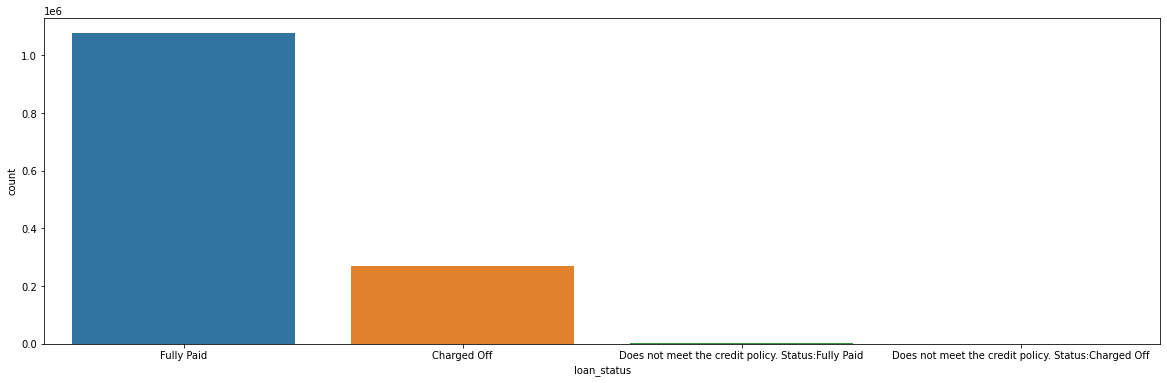

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(df_accepted.loan_status)

In [145]:
keep_list = ['annual_inc','avg_cur_bal', 'dti', 'emp_length','fico_range_low', 'grade', 'home_ownership', 'initial_list_status',
       'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose', 'revol_util', 'term', 'verification_status']

In [146]:
len(keep_list)

18

In [147]:
drop_list = [col for col in df_accepted_dropped.columns if col not in keep_list]
print(drop_list)

['earliest_cr_line']


In [148]:
df_accepted_dropped.drop(labels=drop_list, axis=1, inplace=True)

In [149]:
df_accepted_dropped.shape

(1348059, 18)

In [151]:
df_accepted_dropped.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'fico_range_low', 'pub_rec', 'revol_util',
       'initial_list_status', 'avg_cur_bal', 'mort_acc'],
      dtype='object')

In [150]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

{'emp_length': ['11 years',
  '3 years',
  '4 years',
  '6 years',
  '7 years',
  '8 years',
  '2 years',
  '5 years',
  '9 years',
  '0 years',
  '1 year',
  nan],
 'grade': ['C', 'B', 'F', 'A', 'E', 'D', 'G'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'initial_list_status': ['w', 'f'],
 'loan_status': ['Fully Paid',
  'Charged Off',
  'Does not meet the credit policy. Status:Fully Paid',
  'Does not meet the credit policy. Status:Charged Off'],
 'purpose': ['debt_consolidation',
  'small_business',
  'home_improvement',
  'major_purchase',
  'credit_card',
  'other',
  'house',
  'vacation',
  'car',
  'medical',
  'moving',
  'renewable_energy',
  'wedding',
  'educational'],
 'term': [' 36 months', ' 60 months'],
 'verification_status': ['Not Verified', 'Source Verified', 'Verified']}

In [ ]:
plt.figure(figsize=(30,7))
sns.countplot(x='annual_inc',hue='loan_status',data=df_accepted_dropped,palette='Set1')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


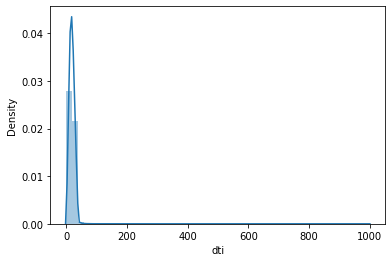

In [166]:
f = sns.distplot(df_accepted_dropped['dti'].dropna())

In [167]:
# def reject_outliers(sr, iq_range=0.5, side='left', return_mask=False):
#     """
#     Takes an array (or pandas series) and returns an array with outliers excluded, according to the
#     interquartile range.
    
#     Parameters:
#     -----------
#     sr: array
#         array of numeric values
#     iq_range: float
#         percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
#     side: string
#         if 'left', will return everything below the highest quartile
#         if 'right', will return everything above the lowest quartile
#         if 'both', will return everything between the high and low quartiles
#     """
#     pcnt = (1 - iq_range) / 2
#     qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
#     iqr = qhigh - qlow
#     if side=='both':
#         mask = (sr - median).abs() <= iqr
#     elif side=='left':
#         mask = (sr - median) <= iqr
#     elif side=='right':
#         mask = (sr - median) >= iqr
#     else:
#         print('options for side are left, right, or both')
    
#     if return_mask:
#         return mask
    
#     return sr[mask]

In [ ]:
# dti_no_outliers = reject_outliers(df_accepted_dropped['dti'], iq_range=0.85) # arrived at 0.85 via trial and error
# f = sns.distplot(dti_no_outliers)

In [171]:
len(dti_no_outliers)

1342290

In [170]:
df_accepted_dropped['dti'].count()

1347685

In [ ]:
_!pip install sweetviz

In [113]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df_accepted_dropped)
#display the report
report.show_html('accepted.html')